 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [5]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1/7, Train Loss: 1.9035, Train Accuracy: 0.5251, Val Loss: 1.9072, Val Accuracy: 0.5174
Epoch 2/7, Train Loss: 1.5049, Train Accuracy: 0.7129, Val Loss: 1.5106, Val Accuracy: 0.7083
Epoch 3/7, Train Loss: 1.2011, Train Accuracy: 0.7712, Val Loss: 1.2079, Val Accuracy: 0.7668
Epoch 4/7, Train Loss: 0.9889, Train Accuracy: 0.8028, Val Loss: 0.9963, Val Accuracy: 0.7973
Epoch 5/7, Train Loss: 0.8437, Train Accuracy: 0.8224, Val Loss: 0.8511, Val Accuracy: 0.8201
Epoch 6/7, Train Loss: 0.7423, Train Accuracy: 0.8359, Val Loss: 0.7495, Val Accuracy: 0.8345
Epoch 7/7, Train Loss: 0.6688, Train Accuracy: 0.8477, Val Loss: 0.6756, Val Accuracy: 0.8453


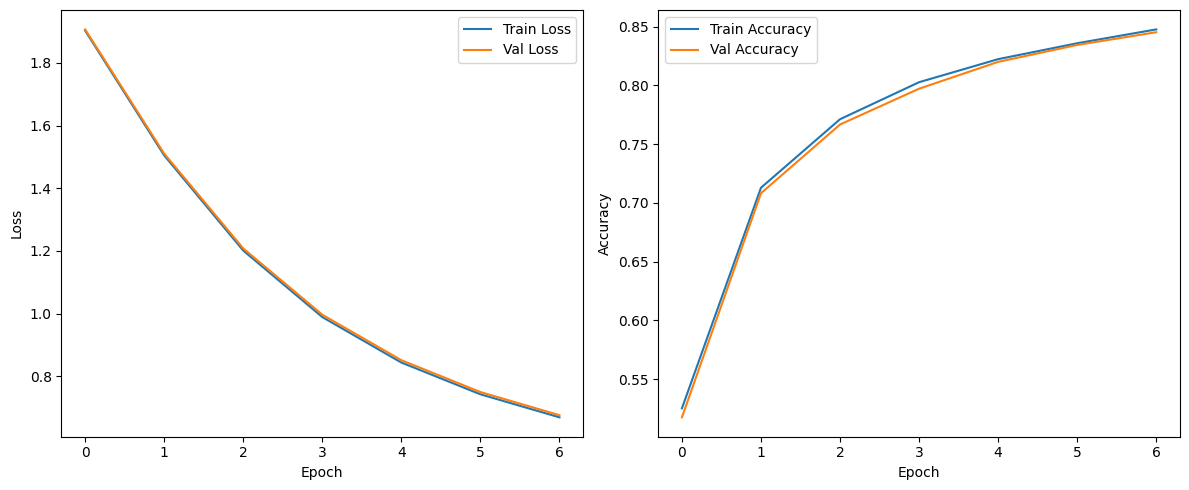

Test Loss: 0.6451, Test Accuracy: 0.8566


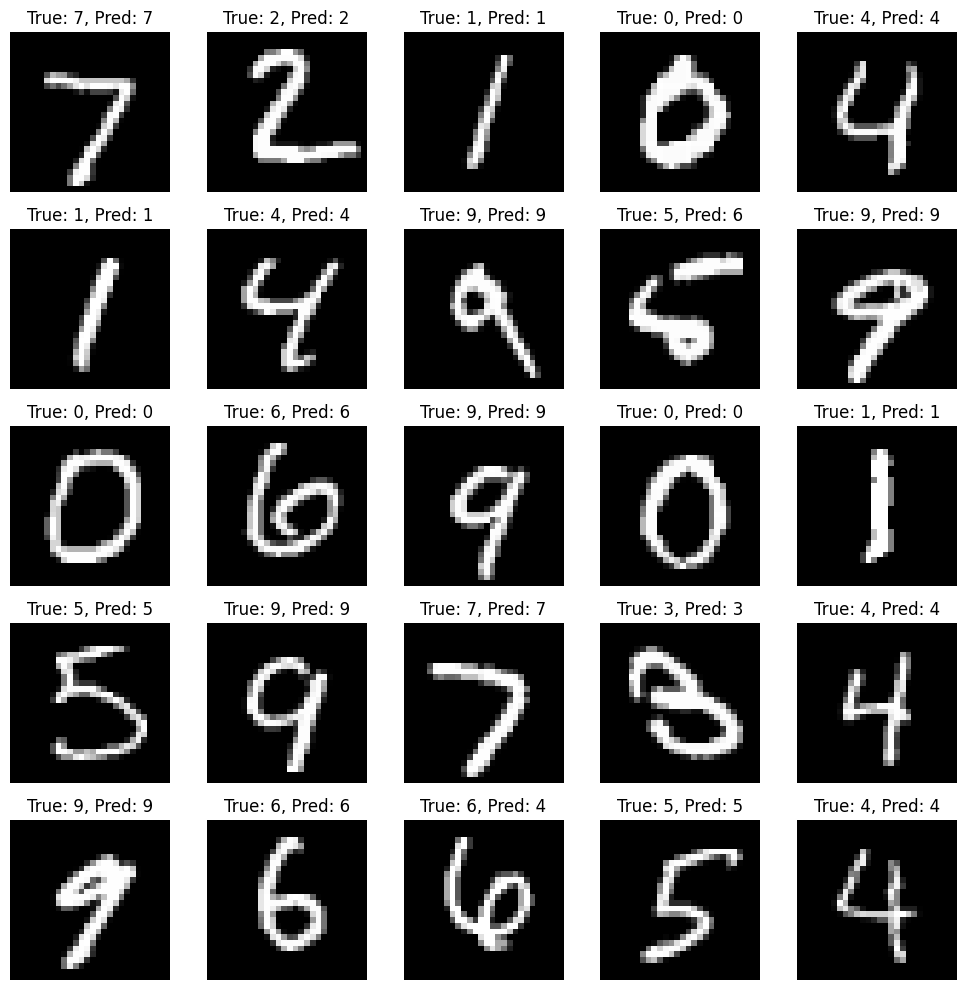

In [6]:
##################################################
# Load MNIST data.
##################################################
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data", mnist_traindata.shape)
print("Training labels", mnist_trainlabel.shape)

# Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data", mnist_testdata.shape)
print("Testing labels", mnist_testlabel.shape)

# Preprocess data: flatten and normalize
train_inputs = mnist_traindata.reshape(mnist_traindata.shape[0], -1) / 255.0
test_inputs = mnist_testdata.reshape(mnist_testdata.shape[0], -1) / 255.0

##################################################
# Define the architecture
##################################################

# Complete the below function to implement ReLU activation function
def ReLu(inp):
    # ReLU returns max(0,x) for each element
    outp = np.maximum(0, inp)
    return outp

# Complete the below function to implement gradient of ReLU activation function
def gradReLu(inp):
    # Gradient of ReLU: 1 if input > 0, otherwise 0
    outp = np.where(inp > 0, 1, 0)
    return outp

# Complete the below function to implement softmax activation function
def softmax(inp):
    # Subtract max for numerical stability
    exp_values = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    # Normalize to get probabilities
    outp = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    return outp

# Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights
    
    # First hidden layer
    z1 = np.dot(inputs, W1)
    a1 = ReLu(z1)
    
    # Second hidden layer
    z2 = np.dot(a1, W2)
    a2 = ReLu(z2)
    
    # Output layer
    z3 = np.dot(a2, W3)
    a3 = softmax(z3)
    
    # Return the required outputs, i.e., final output and intermediate activations
    outps = (a3, (z1, a1, z2, a2, z3, a3))
    return outps

# Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    z1, a1, z2, a2, z3, a3 = activations
    
    # Number of samples
    m = inputs.shape[0]
    
    # Compute the loss (cross-entropy)
    loss = -np.sum(targets * np.log(a3 + 1e-8)) / m
    
    # Compute the derivative of loss at parameters
    # Output layer gradients
    dz3 = a3 - targets  # Derivative of softmax with cross-entropy
    dj_dw3 = np.dot(a2.T, dz3) / m
    
    # Second hidden layer gradients
    dz2 = np.dot(dz3, W3.T) * gradReLu(z2)
    dj_dw2 = np.dot(a1.T, dz2) / m
    
    # First hidden layer gradients
    dz1 = np.dot(dz2, W2.T) * gradReLu(z1)
    dj_dw1 = np.dot(inputs.T, dz1) / m
    
    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]

# Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    # Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients
    
    # Update weights using gradient descent
    W1 = W1 - learning_rate * dj_dw1
    W2 = W2 - learning_rate * dj_dw2
    W3 = W3 - learning_rate * dj_dw3
    
    # Return the updated parameters
    return [W1, W2, W3]

# Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    
    # Compute the gradients
    gradients = computeGradients(inputs, targets, weights, activations)
    
    # Update the parameters using gradients
    updated_weights = applyGradients(weights, gradients, learning_rate)
    
    # Return the updated parameters
    return updated_weights

##################################################
# Train the network
##################################################

# Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size=128, epochs=7, train_val_split=0.8, learning_rate=0.001):
    
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_features = inputs.shape[1]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    # Split the training data into two parts.
    # Use 80 percent of training data for training the network.
    # Remaining 20 percent as validation data
    indices = np.random.permutation(n_samples)
    train_size = int(n_samples * train_val_split)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:]
    
    train_inputs = inputs[train_indices]
    train_targets = targets_idx[train_indices]
    val_inputs = inputs[val_indices]
    val_targets = targets_idx[val_indices]
    
    # One-hot encode targets
    train_targets_onehot = np.zeros((train_targets.shape[0], n_classes))
    train_targets_onehot[np.arange(train_targets.shape[0]), train_targets] = 1
    
    val_targets_onehot = np.zeros((val_targets.shape[0], n_classes))
    val_targets_onehot[np.arange(val_targets.shape[0]), val_targets] = 1
    
    # Randomly initialize the weights (He initialization for ReLU networks)
    np.random.seed(42)
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2.0 / n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2.0 / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2.0 / hidden_units)
    
    weights = [W1, W2, W3]
    
    # Lists to store metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        shuffle_indices = np.random.permutation(train_size)
        train_inputs_shuffled = train_inputs[shuffle_indices]
        train_targets_onehot_shuffled = train_targets_onehot[shuffle_indices]
        
        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, train_size)
            
            batch_inputs = train_inputs_shuffled[start_idx:end_idx]
            batch_targets = train_targets_onehot_shuffled[start_idx:end_idx]
            
            # Forward propagation
            _, activations = fwdPropagate(batch_inputs, weights)
            
            # Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate)
        
        # Compute outputs on training data
        train_outputs, _ = fwdPropagate(train_inputs, weights)
        
        # Compute training accuracy and training error
        train_loss = -np.sum(train_targets_onehot * np.log(train_outputs + 1e-8)) / train_size
        train_pred = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_pred == train_targets)
        
        # Compute outputs on validation data
        val_outputs, _ = fwdPropagate(val_inputs, weights)
        
        # Compute validation accuracy and validation error
        val_loss = -np.sum(val_targets_onehot * np.log(val_outputs + 1e-8)) / val_targets.shape[0]
        val_pred = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_pred == val_targets)
        
        # Store metrics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print the statistics of training
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    # Visualize training progress
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return weights

# Call the training function to train the network
trained_weights = training(train_inputs, mnist_trainlabel)

##################################################
# Evaluate the performance on test data
##################################################
def evaluate(inputs, targets, weights):
    # Convert targets to one-hot encoding
    targets_onehot = np.zeros((targets.shape[0], 10))
    targets_onehot[np.arange(targets.shape[0]), targets] = 1
    
    # Forward pass
    predictions, _ = fwdPropagate(inputs, weights)
    
    # Compute loss
    loss = -np.sum(targets_onehot * np.log(predictions + 1e-8)) / targets.shape[0]
    
    # Compute accuracy
    pred_labels = np.argmax(predictions, axis=1)
    accuracy = np.mean(pred_labels == targets)
    
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    
    # Visualize some predictions
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(mnist_testdata[i], cmap='gray')
        plt.title(f"True: {targets[i]}, Pred: {pred_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return loss, accuracy

# Evaluate on test data
test_loss, test_accuracy = evaluate(test_inputs, mnist_testlabel, trained_weights)


<b> Report your observations </b>

1. The Neural nwetwork runs on Relu activation for hidden layers and softmax for outputs. I have defined other activations just for refernece

2. In the final test (with images), we can see only very difficult (distorted) images are classified incorrectly, the rest bring fine.

3. The convergence is also steady as per the plots, for the epochs that i have run it with



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



Training with sigmoid activation function...
  Epoch 1/5, Training Accuracy: 0.1429
  Epoch 5/5, Training Accuracy: 0.5465
  Final Test Accuracy with sigmoid: 0.5648
Training with tanh activation function...
  Epoch 1/5, Training Accuracy: 0.8544
  Epoch 5/5, Training Accuracy: 0.9025
  Final Test Accuracy with tanh: 0.9069
Training with relu activation function...
  Epoch 1/5, Training Accuracy: 0.8595
  Epoch 5/5, Training Accuracy: 0.9169
  Final Test Accuracy with relu: 0.9207
Training with leaky_relu activation function...
  Epoch 1/5, Training Accuracy: 0.8541
  Epoch 5/5, Training Accuracy: 0.9169
  Final Test Accuracy with leaky_relu: 0.9214


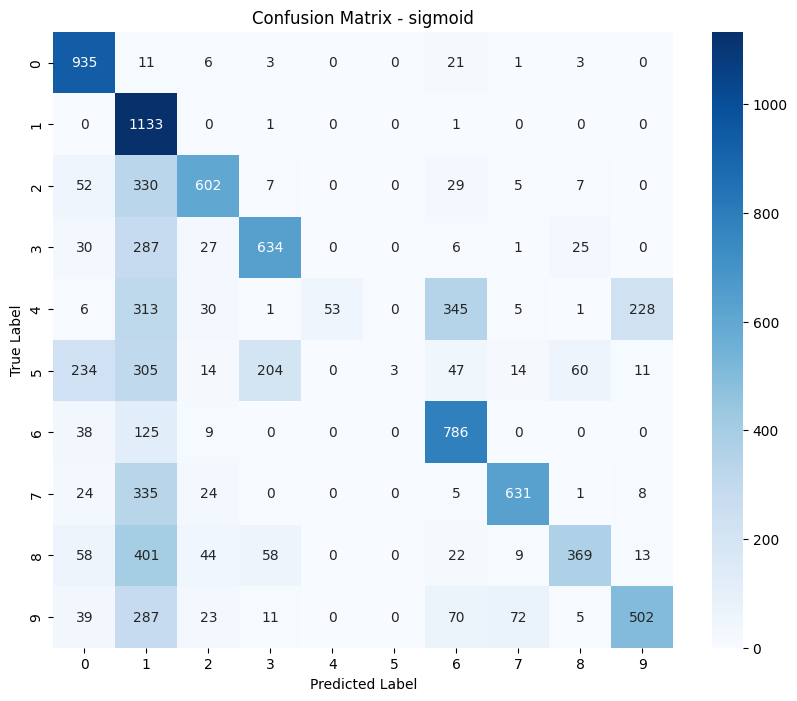

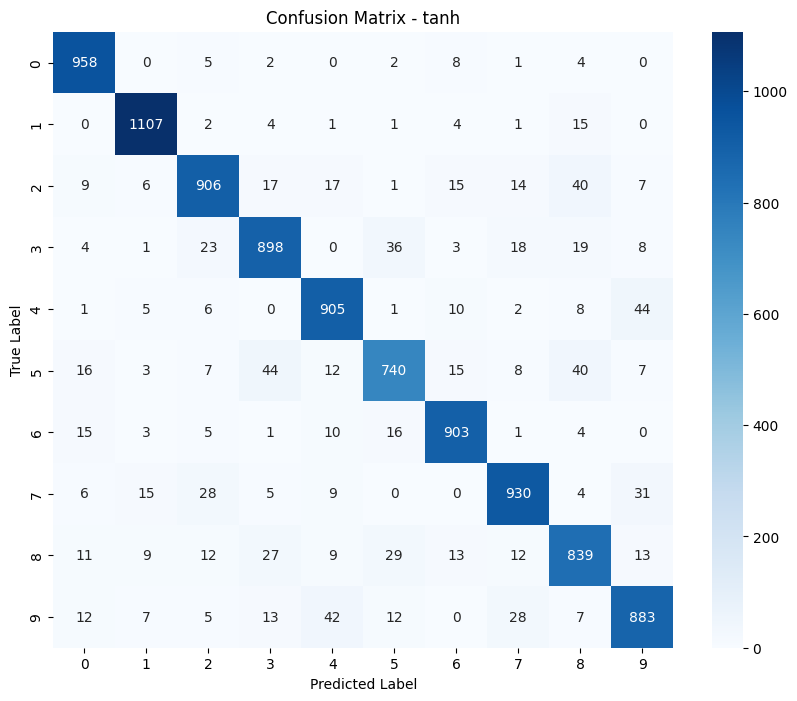

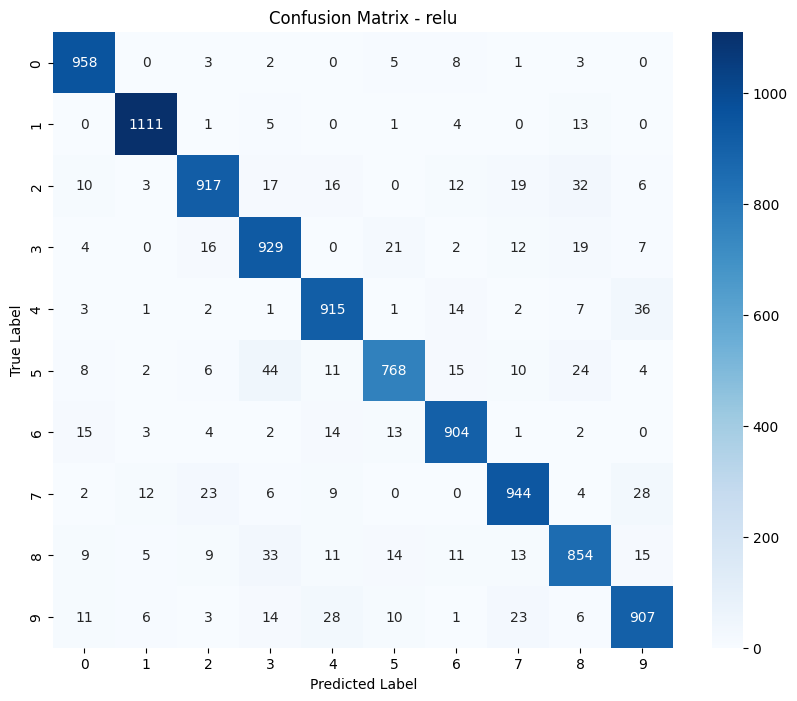

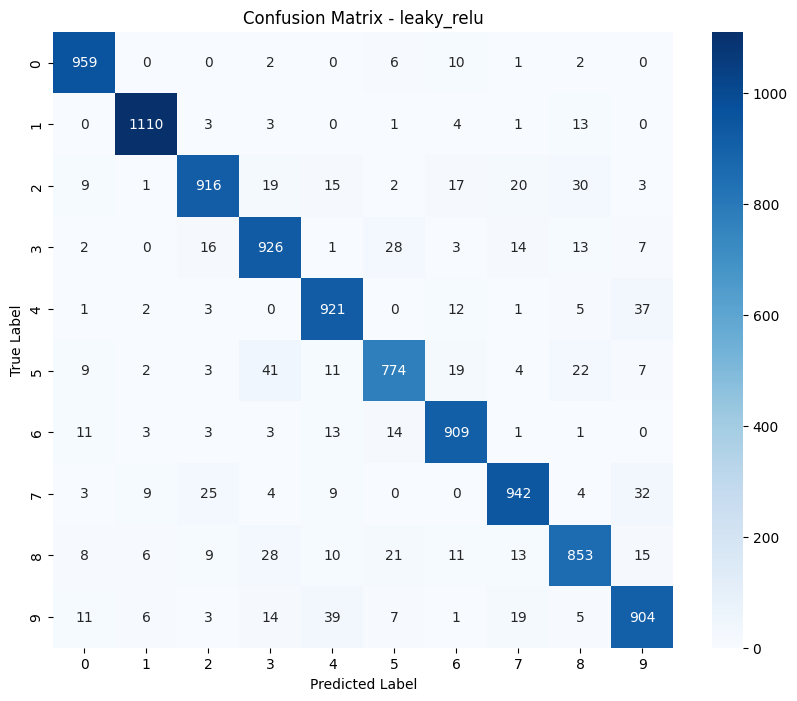

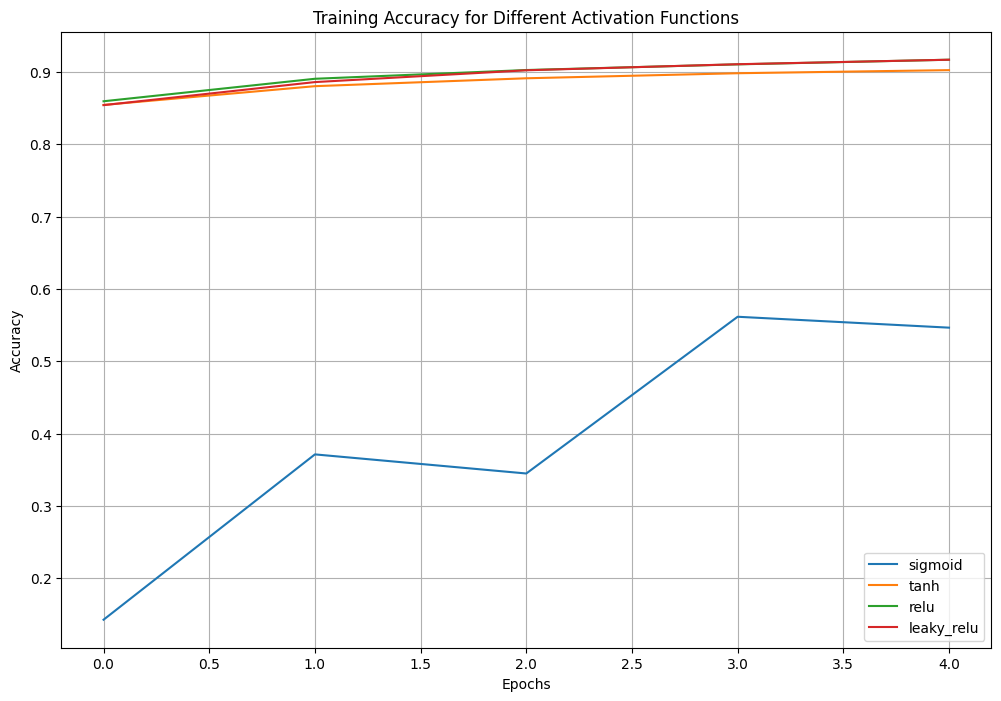


Final Results Summary:
----------------------------------------
Sigmoid    Test Accuracy: 0.5648
Tanh       Test Accuracy: 0.9069
Relu       Test Accuracy: 0.9207
Leaky_relu Test Accuracy: 0.9214


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Preprocess data
train_inputs = mnist_trainset.data.numpy().reshape(mnist_trainset.data.shape[0], -1) / 255.0
train_targets = mnist_trainset.targets.numpy()
test_inputs = mnist_testset.data.numpy().reshape(mnist_testset.data.shape[0], -1) / 255.0
test_targets = mnist_testset.targets.numpy()

# Activation functions implementations
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def grad_tanh(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def grad_relu(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def grad_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Forward propagation with configurable activation function
def forward_propagate(inputs, weights, activation_func):
    W1, W2, W3 = weights
    
    # First hidden layer
    z1 = np.dot(inputs, W1)
    a1 = activation_func(z1)
    
    # Second hidden layer
    z2 = np.dot(a1, W2)
    a2 = activation_func(z2)
    
    # Output layer (always softmax)
    z3 = np.dot(a2, W3)
    a3 = softmax(z3)
    
    return a3, (z1, a1, z2, a2, z3, a3)

# Backward propagation with configurable activation gradient
def backward_propagate(inputs, targets, weights, activations, learning_rate, grad_activation):
    W1, W2, W3 = weights
    z1, a1, z2, a2, z3, a3 = activations
    
    m = inputs.shape[0]
    
    # Output layer gradient
    dz3 = a3 - targets
    dW3 = np.dot(a2.T, dz3) / m
    
    # Second hidden layer gradient
    dz2 = np.dot(dz3, W3.T) * grad_activation(z2)
    dW2 = np.dot(a1.T, dz2) / m
    
    # First hidden layer gradient
    dz1 = np.dot(dz2, W2.T) * grad_activation(z1)
    dW1 = np.dot(inputs.T, dz1) / m
    
    # Update weights
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    W3 = W3 - learning_rate * dW3
    
    return [W1, W2, W3]

# Training function with configurable activation
def train_network(activation_name, epochs=5, learning_rate=0.01, batch_size=128):
    print(f"Training with {activation_name} activation function...")
    
    # Set activation function and its gradient
    if activation_name == 'sigmoid':
        activation_func = sigmoid
        grad_activation = grad_sigmoid
    elif activation_name == 'tanh':
        activation_func = tanh
        grad_activation = grad_tanh
    elif activation_name == 'relu':
        activation_func = relu
        grad_activation = grad_relu
    elif activation_name == 'leaky_relu':
        activation_func = leaky_relu
        grad_activation = grad_leaky_relu
    else:
        raise ValueError(f"Unknown activation function: {activation_name}")
    
    # Network architecture
    hidden_units = 512
    n_classes = 10
    n_features = train_inputs.shape[1]
    n_samples = train_inputs.shape[0]
    train_size = int(n_samples * 0.8)  # 80% for training, 20% for validation
    n_batches = int(np.ceil(train_size / batch_size))
    
    # Initialize weights (adjust initialization based on activation function)
    if activation_name == 'relu' or activation_name == 'leaky_relu':
        # He initialization for ReLU activations
        W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2.0 / n_features)
        W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2.0 / hidden_units)
    else:
        # Xavier/Glorot initialization for sigmoid/tanh
        W1 = np.random.randn(n_features, hidden_units) * np.sqrt(1.0 / n_features)
        W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(1.0 / hidden_units)
    
    # Output layer (same for all activation functions)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(1.0 / hidden_units)
    
    weights = [W1, W2, W3]
    
    # Prepare one-hot encoded targets
    train_targets_onehot = np.zeros((n_samples, n_classes))
    train_targets_onehot[np.arange(n_samples), train_targets] = 1
    
    # Training loop
    train_accuracies = []
    
    for epoch in range(epochs):
        # Shuffle training data
        indices = np.random.permutation(n_samples)
        x_shuffled = train_inputs[indices]
        y_shuffled = train_targets_onehot[indices]
        
        # Process batches
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, n_samples)
            
            batch_x = x_shuffled[start_idx:end_idx]
            batch_y = y_shuffled[start_idx:end_idx]
            
            # Forward and backward pass
            _, activations = forward_propagate(batch_x, weights, activation_func)
            weights = backward_propagate(batch_x, batch_y, weights, activations, learning_rate, grad_activation)
        
        # Evaluate on training data
        outputs, _ = forward_propagate(train_inputs, weights, activation_func)
        predictions = np.argmax(outputs, axis=1)
        accuracy = np.mean(predictions == train_targets)
        train_accuracies.append(accuracy)
        
        if (epoch + 1) % 5 == 0 or epoch == 0:
            print(f"  Epoch {epoch+1}/{epochs}, Training Accuracy: {accuracy:.4f}")
    
    # Evaluate on test data
    test_outputs, _ = forward_propagate(test_inputs, weights, activation_func)
    test_predictions = np.argmax(test_outputs, axis=1)
    test_accuracy = np.mean(test_predictions == test_targets)
    print(f"  Final Test Accuracy with {activation_name}: {test_accuracy:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(test_targets, test_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {activation_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'confusion_matrix_{activation_name}.png')
    
    return test_accuracy, train_accuracies, weights

# Train networks with different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

for activation in activation_functions:
    test_accuracy, train_accuracies, weights = train_network(activation)
    results[activation] = {
        'test_accuracy': test_accuracy,
        'train_accuracies': train_accuracies,
        'weights': weights
    }

# Plot training curves
plt.figure(figsize=(12, 8))
for activation, data in results.items():
    plt.plot(data['train_accuracies'], label=activation)
plt.title('Training Accuracy for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('activation_functions_comparison.png')
plt.show()

# Print final results summary
print("\nFinal Results Summary:")
print("-" * 40)
for activation, data in results.items():
    print(f"{activation.capitalize():10} Test Accuracy: {data['test_accuracy']:.4f}")


<b> Report your observations </b>

1. out of all the activation functions, leaky relu has given the best accuracy, closely followed by relu, tanh and the worst performance is given by sigmoid

2. We can also see that the misclassified numbers in  the confusion matrix across all the activations are similar (eg: 3 misclassif as 2)

3. The convergence nature is similar across the activation functions, the exception being sigmoid which converges to a lower accuracy.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

Training with SGD optimizer...
SGD: Epoch 1/7, Train Acc: 0.8688, Val Acc: 0.8661
SGD: Epoch 2/7, Train Acc: 0.8968, Val Acc: 0.8943
SGD: Epoch 3/7, Train Acc: 0.9083, Val Acc: 0.9058
SGD: Epoch 4/7, Train Acc: 0.9169, Val Acc: 0.9123
SGD: Epoch 5/7, Train Acc: 0.9239, Val Acc: 0.9184
SGD: Epoch 6/7, Train Acc: 0.9278, Val Acc: 0.9231
SGD: Epoch 7/7, Train Acc: 0.9324, Val Acc: 0.9261

Training with Adam optimizer...
Adam: Epoch 1/7, Train Acc: 0.9725, Val Acc: 0.9634
Adam: Epoch 2/7, Train Acc: 0.9825, Val Acc: 0.9697
Adam: Epoch 3/7, Train Acc: 0.9871, Val Acc: 0.9737
Adam: Epoch 4/7, Train Acc: 0.9927, Val Acc: 0.9768
Adam: Epoch 5/7, Train Acc: 0.9955, Val Acc: 0.9775
Adam: Epoch 6/7, Train Acc: 0.9947, Val Acc: 0.9753
Adam: Epoch 7/7, Train Acc: 0.9946, Val Acc: 0.9777


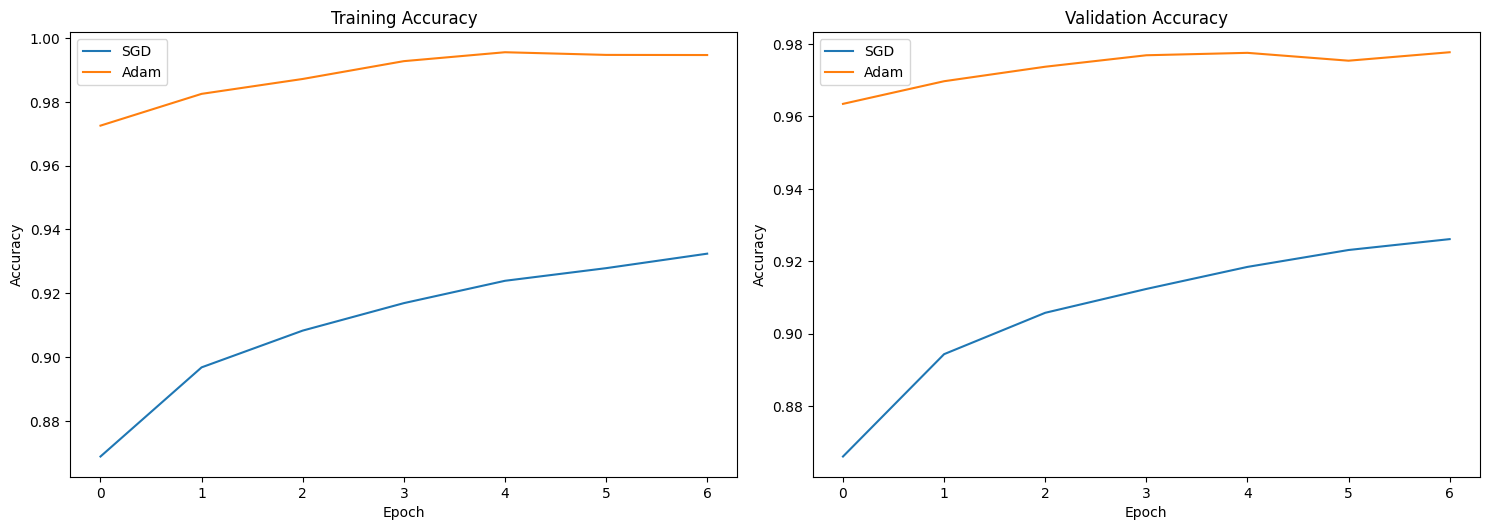


Test Results:
SGD - Test Accuracy: 0.9329
Adam - Test Accuracy: 0.9739


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

# Preprocess data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
train_inputs = mnist_trainset.data.numpy().reshape(mnist_trainset.data.shape[0], -1) / 255.0
train_targets = mnist_trainset.targets.numpy()
test_inputs = mnist_testset.data.numpy().reshape(mnist_testset.data.shape[0], -1) / 255.0
test_targets = mnist_testset.targets.numpy()

# ReLU activation function
def ReLu(inp):
    return np.maximum(0, inp)

# Gradient of ReLU
def gradReLu(inp):
    return np.where(inp > 0, 1, 0)

# Softmax activation function
def softmax(inp):
    exp_values = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Forward propagation with ReLU
def fwdPropagate(inputs, weights):
    W1, W2, W3 = weights
    
    # First hidden layer
    z1 = np.dot(inputs, W1)
    a1 = ReLu(z1)
    
    # Second hidden layer
    z2 = np.dot(a1, W2)
    a2 = ReLu(z2)
    
    # Output layer
    z3 = np.dot(a2, W3)
    a3 = softmax(z3)
    
    return a3, (z1, a1, z2, a2, z3, a3)

# Compute gradients for backpropagation
def computeGradients(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    z1, a1, z2, a2, z3, a3 = activations
    
    m = inputs.shape[0]
    
    # Compute the loss
    loss = -np.sum(targets * np.log(a3 + 1e-8)) / m
    
    # Output layer gradient
    dz3 = a3 - targets
    dj_dw3 = np.dot(a2.T, dz3) / m
    
    # Second hidden layer gradient
    dz2 = np.dot(dz3, W3.T) * gradReLu(z2)
    dj_dw2 = np.dot(a1.T, dz2) / m
    
    # First hidden layer gradient
    dz1 = np.dot(dz2, W2.T) * gradReLu(z1)
    dj_dw1 = np.dot(inputs.T, dz1) / m
    
    return [dj_dw1, dj_dw2, dj_dw3]

# Update parameters using SGD
def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients
    
    W1 = W1 - learning_rate * dj_dw1
    W2 = W2 - learning_rate * dj_dw2
    W3 = W3 - learning_rate * dj_dw3
    
    return [W1, W2, W3]

# SGD Backpropagation
def backPropagate(inputs, targets, weights, activations, learning_rate):
    gradients = computeGradients(inputs, targets, weights, activations)
    updated_weights = applyGradients(weights, gradients, learning_rate)
    return updated_weights

# Modified training function to return 5 values like training_adam
def training(inputs, targets_idx, batch_size=128, epochs=7, train_val_split=0.8, learning_rate=0.001):
    # Setup parameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_features = inputs.shape[1]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    # Split data into training and validation
    indices = np.random.permutation(n_samples)
    train_size = int(n_samples * train_val_split)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:]
    
    train_inputs = inputs[train_indices]
    train_targets = targets_idx[train_indices]
    val_inputs = inputs[val_indices]
    val_targets = targets_idx[val_indices]
    
    # One-hot encode targets
    train_targets_onehot = np.zeros((train_targets.shape[0], n_classes))
    train_targets_onehot[np.arange(train_targets.shape[0]), train_targets] = 1
    
    val_targets_onehot = np.zeros((val_targets.shape[0], n_classes))
    val_targets_onehot[np.arange(val_targets.shape[0]), val_targets] = 1
    
    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2.0 / n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2.0 / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2.0 / hidden_units)
    
    weights = [W1, W2, W3]
    
    # Track metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffle_indices = np.random.permutation(train_size)
        train_inputs_shuffled = train_inputs[shuffle_indices]
        train_targets_onehot_shuffled = train_targets_onehot[shuffle_indices]
        
        # Process batches
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, train_size)
            
            batch_inputs = train_inputs_shuffled[start_idx:end_idx]
            batch_targets = train_targets_onehot_shuffled[start_idx:end_idx]
            
            # Forward and backward pass
            _, activations = fwdPropagate(batch_inputs, weights)
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate)
        
        # Evaluate performance
        train_outputs, _ = fwdPropagate(train_inputs, weights)
        train_loss = -np.sum(train_targets_onehot * np.log(train_outputs + 1e-8)) / train_size
        train_pred = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_pred == train_targets)
        
        val_outputs, _ = fwdPropagate(val_inputs, weights)
        val_loss = -np.sum(val_targets_onehot * np.log(val_outputs + 1e-8)) / val_targets.shape[0]
        val_pred = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_pred == val_targets)
        
        # Store metrics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print progress
        print(f"SGD: Epoch {epoch+1}/{epochs}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")
    
    # Return 5 values to match the adam training function
    return weights, train_losses, train_accuracies, val_losses, val_accuracies

# Adam optimization implementation
def adam_optimize(weights, gradients, m, v, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """Adam optimization algorithm"""
    W1, W2, W3 = weights
    dW1, dW2, dW3 = gradients
    m1, m2, m3 = m
    v1, v2, v3 = v
    
    # Update biased first moment estimate (momentum)
    m1 = beta1 * m1 + (1 - beta1) * dW1
    m2 = beta1 * m2 + (1 - beta1) * dW2
    m3 = beta1 * m3 + (1 - beta1) * dW3
    
    # Update biased second moment estimate (RMSProp component)
    v1 = beta2 * v1 + (1 - beta2) * (dW1**2)
    v2 = beta2 * v2 + (1 - beta2) * (dW2**2)
    v3 = beta2 * v3 + (1 - beta2) * (dW3**2)
    
    # Correct bias in first moment
    m1_corrected = m1 / (1 - beta1**t)
    m2_corrected = m2 / (1 - beta1**t)
    m3_corrected = m3 / (1 - beta1**t)
    
    # Correct bias in second moment
    v1_corrected = v1 / (1 - beta2**t)
    v2_corrected = v2 / (1 - beta2**t)
    v3_corrected = v3 / (1 - beta2**t)
    
    # Update parameters
    W1 = W1 - learning_rate * m1_corrected / (np.sqrt(v1_corrected) + epsilon)
    W2 = W2 - learning_rate * m2_corrected / (np.sqrt(v2_corrected) + epsilon)
    W3 = W3 - learning_rate * m3_corrected / (np.sqrt(v3_corrected) + epsilon)
    
    return [W1, W2, W3], [m1, m2, m3], [v1, v2, v3]

def backPropagate_adam(inputs, targets, weights, activations, m, v, t, learning_rate=0.001):
    # Compute gradients
    gradients = computeGradients(inputs, targets, weights, activations)
    
    # Update parameters using Adam
    updated_weights, updated_m, updated_v = adam_optimize(weights, gradients, m, v, t, learning_rate)
    
    return updated_weights, updated_m, updated_v

def training_adam(inputs, targets_idx, batch_size=128, epochs=7, train_val_split=0.8, learning_rate=0.001):
    # Setup parameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_features = inputs.shape[1]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    # Split data into training and validation
    indices = np.random.permutation(n_samples)
    train_size = int(n_samples * train_val_split)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:]
    
    train_inputs = inputs[train_indices]
    train_targets = targets_idx[train_indices]
    val_inputs = inputs[val_indices]
    val_targets = targets_idx[val_indices]
    
    # One-hot encode targets
    train_targets_onehot = np.zeros((train_targets.shape[0], n_classes))
    train_targets_onehot[np.arange(train_targets.shape[0]), train_targets] = 1
    
    val_targets_onehot = np.zeros((val_targets.shape[0], n_classes))
    val_targets_onehot[np.arange(val_targets.shape[0]), val_targets] = 1
    
    # Initialize weights with He initialization (good for ReLU)
    np.random.seed(42)
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2.0 / n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2.0 / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2.0 / hidden_units)
    
    weights = [W1, W2, W3]
    
    # Initialize Adam parameters
    m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    t = 0
    
    # Track metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffle_indices = np.random.permutation(train_size)
        train_inputs_shuffled = train_inputs[shuffle_indices]
        train_targets_onehot_shuffled = train_targets_onehot[shuffle_indices]
        
        # Process batches
        for batch in range(n_batches):
            t += 1  # Increment time step
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, train_size)
            
            batch_inputs = train_inputs_shuffled[start_idx:end_idx]
            batch_targets = train_targets_onehot_shuffled[start_idx:end_idx]
            
            # Forward and backward pass
            _, activations = fwdPropagate(batch_inputs, weights)
            weights, m, v = backPropagate_adam(batch_inputs, batch_targets, weights, activations, m, v, t, learning_rate)
        
        # Evaluate performance
        train_outputs, _ = fwdPropagate(train_inputs, weights)
        train_pred = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_pred == train_targets)
        
        val_outputs, _ = fwdPropagate(val_inputs, weights)
        val_pred = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_pred == val_targets)
        
        # Store metrics
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Print progress
        print(f"Adam: Epoch {epoch+1}/{epochs}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")
    
    return weights, train_losses, train_accuracies, val_losses, val_accuracies

def compare_optimizers(inputs, targets_idx, batch_size=128, epochs=7):
    print("Training with SGD optimizer...")
    sgd_weights, sgd_train_losses, sgd_train_accs, sgd_val_losses, sgd_val_accs = training(
        inputs, targets_idx, batch_size, epochs, learning_rate=0.01)
    
    print("\nTraining with Adam optimizer...")
    adam_weights, adam_train_losses, adam_train_accs, adam_val_losses, adam_val_accs = training_adam(
        inputs, targets_idx, batch_size, epochs, learning_rate=0.001)
    
    # Plot comparison
    plt.figure(figsize=(15, 10))
    

    
    # Training Accuracy
    plt.subplot(2, 2, 3)
    plt.plot(sgd_train_accs, label='SGD')
    plt.plot(adam_train_accs, label='Adam')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Validation Accuracy
    plt.subplot(2, 2, 4)
    plt.plot(sgd_val_accs, label='SGD')
    plt.plot(adam_val_accs, label='Adam')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Test data evaluation
    test_inputs = mnist_testset.data.numpy().reshape(mnist_testset.data.shape[0], -1) / 255.0
    test_targets = mnist_testset.targets.numpy()
    
    # Get predictions
    sgd_outputs, _ = fwdPropagate(test_inputs, sgd_weights)
    sgd_pred = np.argmax(sgd_outputs, axis=1)
    sgd_test_accuracy = np.mean(sgd_pred == test_targets)
    
    adam_outputs, _ = fwdPropagate(test_inputs, adam_weights)
    adam_pred = np.argmax(adam_outputs, axis=1)
    adam_test_accuracy = np.mean(adam_pred == test_targets)
    
    print("\nTest Results:")
    print(f"SGD - Test Accuracy: {sgd_test_accuracy:.4f}")
    print(f"Adam - Test Accuracy: {adam_test_accuracy:.4f}")
    
    return sgd_test_accuracy, adam_test_accuracy

# Run comparison
sgd_accuracy, adam_accuracy = compare_optimizers(train_inputs, train_targets)


<b> Report your observations </b>

1. Adam differs from SGD by combining momentum and adaptive learning rates. Unlike SGD, which uses the same learning rate for all parameters, Adam adjusts learning rates individually using moving averages of past gradients. This helps it handle noisy or sparse gradients more effectively.

2. Adam has really good accuracy while starting itself and converges much faster at the end of my epochs.

3. Relu is also mitigates the vanishing grad problem to a good degree


<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


Epoch 1/5, Train Loss: 1.0659, Train Acc: 0.8677, Val Loss: 0.5313, Val Acc: 0.8706
Epoch 2/5, Train Loss: 0.4562, Train Acc: 0.8960, Val Loss: 0.3802, Val Acc: 0.8950
Epoch 3/5, Train Loss: 0.3655, Train Acc: 0.9088, Val Loss: 0.3286, Val Acc: 0.9088
Epoch 4/5, Train Loss: 0.3244, Train Acc: 0.9169, Val Loss: 0.2988, Val Acc: 0.9163
Epoch 5/5, Train Loss: 0.2975, Train Acc: 0.9216, Val Loss: 0.2795, Val Acc: 0.9215
L2 Regularization Test Accuracy: 0.9243
Epoch 1/5, Train Loss: 1.1978, Train Acc: 0.8597, Val Loss: 0.5639, Val Acc: 0.8610
Epoch 2/5, Train Loss: 0.5604, Train Acc: 0.8910, Val Loss: 0.4020, Val Acc: 0.8875
Epoch 3/5, Train Loss: 0.4516, Train Acc: 0.9049, Val Loss: 0.3462, Val Acc: 0.9022
Epoch 4/5, Train Loss: 0.3958, Train Acc: 0.9127, Val Loss: 0.3151, Val Acc: 0.9106
Epoch 5/5, Train Loss: 0.3623, Train Acc: 0.9185, Val Loss: 0.2914, Val Acc: 0.9167
Dropout Test Accuracy: 0.9202
Epoch 1/5, Train Loss: 0.5424, Train Acc: 0.8699, Val Loss: 0.5268, Val Acc: 0.8722
Epoch 

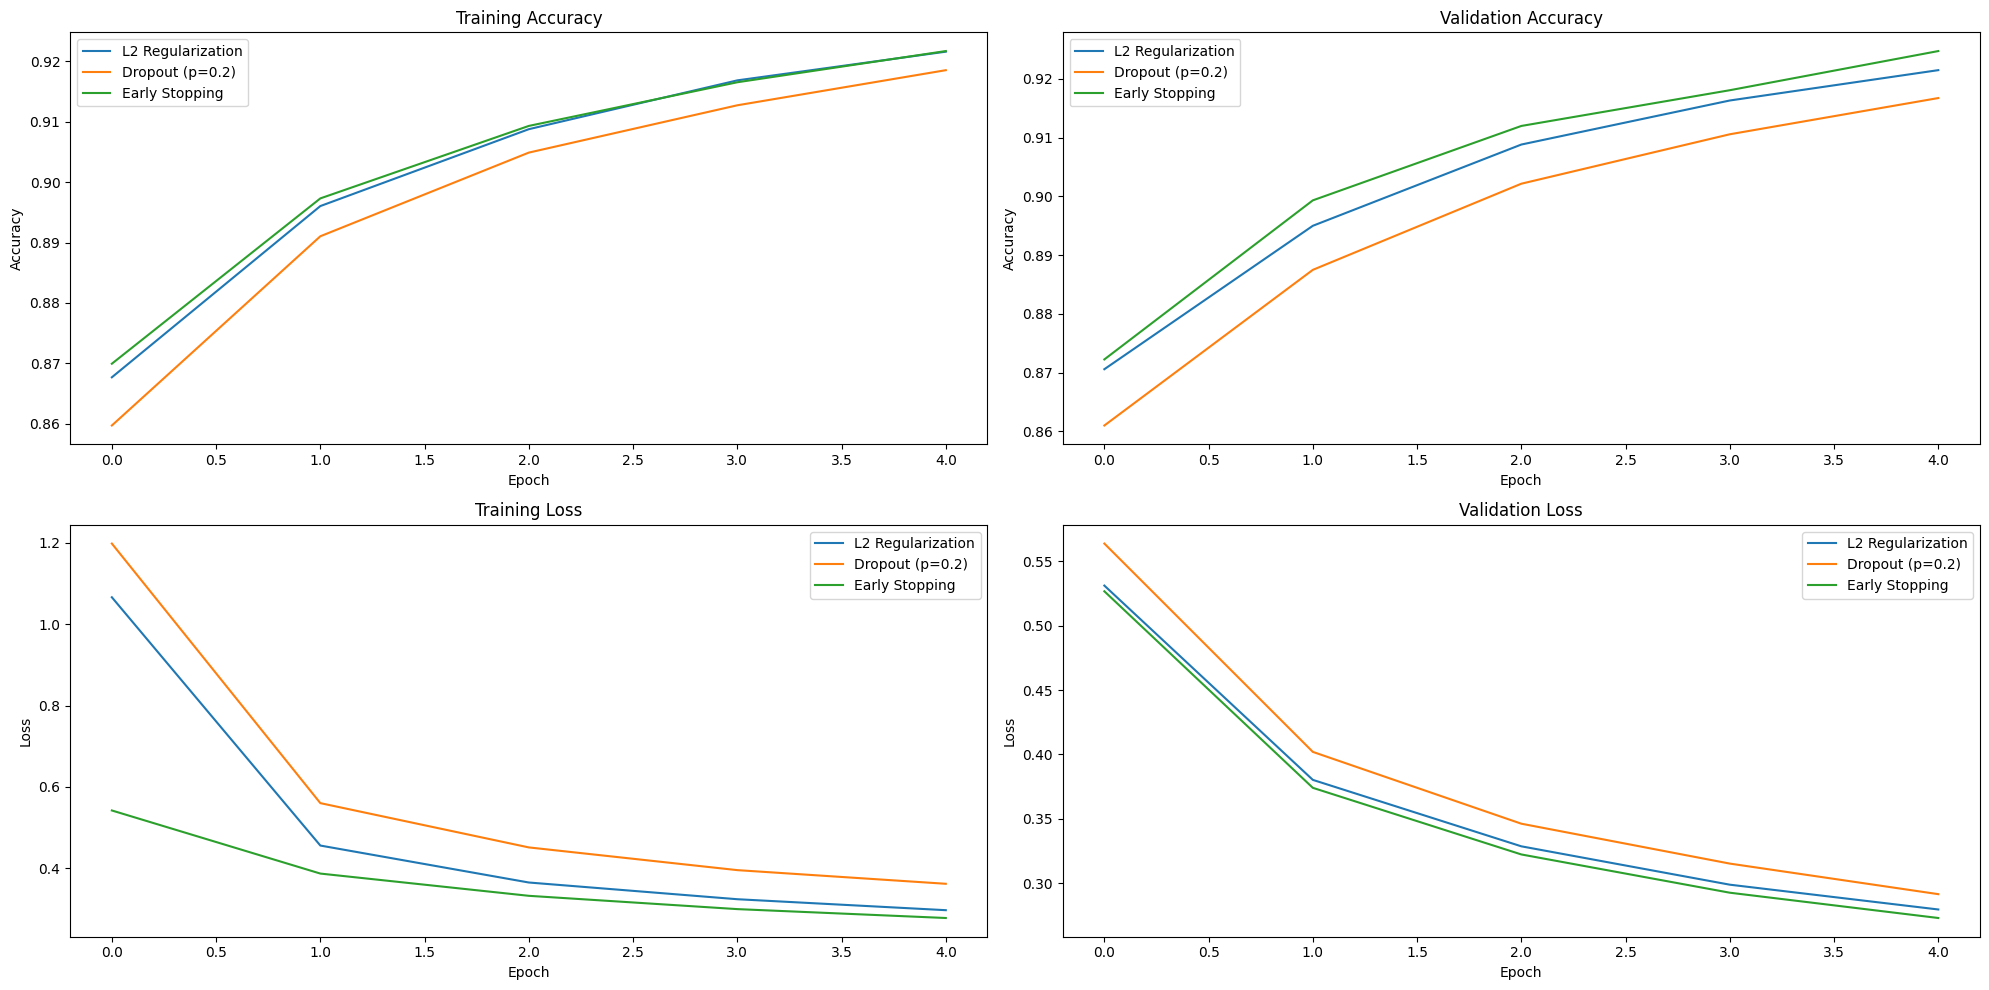


Test Accuracy Comparison:
L2 Regularization: 0.9243
Dropout (p=0.2): 0.9202
Early Stopping: 0.9242


In [9]:
##################################################
#Training with weight regularization
##################################################
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

# Load and preprocess data (reusing code from previous parts)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
train_inputs = mnist_trainset.data.numpy().reshape(mnist_trainset.data.shape[0], -1) / 255.0
train_targets = mnist_trainset.targets.numpy()
test_inputs = mnist_testset.data.numpy().reshape(mnist_testset.data.shape[0], -1) / 255.0
test_targets = mnist_testset.targets.numpy()

# Modified computeGradients function with L2 regularization
def computeGradients_L2(inputs, targets, weights, activations, lambda_reg=0.001):
    W1, W2, W3 = weights
    z1, a1, z2, a2, z3, a3 = activations
    
    m = inputs.shape[0]
    
    # Compute the loss with L2 regularization term
    loss_ce = -np.sum(targets * np.log(a3 + 1e-8)) / m
    loss_reg = (lambda_reg / (2*m)) * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))
    loss = loss_ce + loss_reg
    
    # Output layer gradient
    dz3 = a3 - targets
    dj_dw3 = np.dot(a2.T, dz3) / m + (lambda_reg / m) * W3
    
    # Second hidden layer gradient
    dz2 = np.dot(dz3, W3.T) * (a2 > 0)
    dj_dw2 = np.dot(a1.T, dz2) / m + (lambda_reg / m) * W2
    
    # First hidden layer gradient
    dz1 = np.dot(dz2, W2.T) * (a1 > 0)
    dj_dw1 = np.dot(inputs.T, dz1) / m + (lambda_reg / m) * W1
    
    return [dj_dw1, dj_dw2, dj_dw3], loss

# Training function with L2 regularization
def train_with_L2_reg(inputs, targets_idx, lambda_reg=0.001, batch_size=128, epochs=5):
    # Network architecture
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_features = inputs.shape[1]
    
    # Split into training and validation sets
    indices = np.random.permutation(n_samples)
    train_size = int(n_samples * 0.8)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:]
    
    train_inputs = inputs[train_indices]
    train_targets = targets_idx[train_indices]
    val_inputs = inputs[val_indices]
    val_targets = targets_idx[val_indices]
    
    # One-hot encode targets
    train_targets_onehot = np.zeros((train_targets.shape[0], n_classes))
    train_targets_onehot[np.arange(train_targets.shape[0]), train_targets] = 1
    
    val_targets_onehot = np.zeros((val_targets.shape[0], n_classes))
    val_targets_onehot[np.arange(val_targets.shape[0]), val_targets] = 1
    
    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2.0/n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2.0/hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2.0/hidden_units)
    weights = [W1, W2, W3]
    
    # Track metrics
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    
    n_batches = int(np.ceil(train_size / batch_size))
    
    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffle_indices = np.random.permutation(train_size)
        shuffled_inputs = train_inputs[shuffle_indices]
        shuffled_targets = train_targets_onehot[shuffle_indices]
        
        epoch_loss = 0
        
        # Process batches
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, train_size)
            
            batch_inputs = shuffled_inputs[start_idx:end_idx]
            batch_targets = shuffled_targets[start_idx:end_idx]
            
            # Forward pass
            z1 = np.dot(batch_inputs, W1)
            a1 = np.maximum(0, z1)  # ReLU
            
            z2 = np.dot(a1, W2)
            a2 = np.maximum(0, z2)  # ReLU
            
            z3 = np.dot(a2, W3)
            # Softmax
            exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
            a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
            
            activations = (z1, a1, z2, a2, z3, a3)
            
            # Compute gradients with L2 regularization
            gradients, batch_loss = computeGradients_L2(batch_inputs, batch_targets, 
                                                      weights, activations, lambda_reg)
            epoch_loss += batch_loss
            
            # Update weights with SGD
            learning_rate = 0.01
            W1 -= learning_rate * gradients[0]
            W2 -= learning_rate * gradients[1]
            W3 -= learning_rate * gradients[2]
            
            weights = [W1, W2, W3]
        
        # Evaluate on training set
        z1 = np.dot(train_inputs, W1)
        a1 = np.maximum(0, z1)
        z2 = np.dot(a1, W2)
        a2 = np.maximum(0, z2)
        z3 = np.dot(a2, W3)
        exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
        a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
        
        train_pred = np.argmax(a3, axis=1)
        train_acc = np.mean(train_pred == train_targets)
        train_accs.append(train_acc)
        train_losses.append(epoch_loss / n_batches)
        
        # Evaluate on validation set
        z1 = np.dot(val_inputs, W1)
        a1 = np.maximum(0, z1)
        z2 = np.dot(a1, W2)
        a2 = np.maximum(0, z2)
        z3 = np.dot(a2, W3)
        exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
        a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
        
        val_loss = -np.sum(val_targets_onehot * np.log(a3 + 1e-8)) / val_targets.shape[0]
        val_pred = np.argmax(a3, axis=1)
        val_acc = np.mean(val_pred == val_targets)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Test set evaluation
    z1 = np.dot(test_inputs, W1)
    a1 = np.maximum(0, z1)
    z2 = np.dot(a1, W2)
    a2 = np.maximum(0, z2)
    z3 = np.dot(a2, W3)
    exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
    a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
    
    test_pred = np.argmax(a3, axis=1)
    test_acc = np.mean(test_pred == test_targets)
    print(f"L2 Regularization Test Accuracy: {test_acc:.4f}")
    
    return weights, test_acc, (train_losses, train_accs, val_losses, val_accs)

# Run L2 regularization training
l2_weights, l2_test_acc, l2_metrics = train_with_L2_reg(train_inputs, train_targets, lambda_reg=0.001)








##################################################
#Training with dropout strategy
##################################################
# Forward propagation with dropout
def forward_with_dropout(inputs, weights, dropout_rate=0.2, is_training=True):
    W1, W2, W3 = weights
    
    # First hidden layer
    z1 = np.dot(inputs, W1)
    a1 = np.maximum(0, z1)  # ReLU
    
    # Apply dropout to first hidden layer during training
    if is_training:
        mask1 = np.random.binomial(1, 1-dropout_rate, size=a1.shape) / (1-dropout_rate)
        a1 *= mask1
    
    # Second hidden layer
    z2 = np.dot(a1, W2)
    a2 = np.maximum(0, z2)  # ReLU
    
    # Apply dropout to second hidden layer during training
    if is_training:
        mask2 = np.random.binomial(1, 1-dropout_rate, size=a2.shape) / (1-dropout_rate)
        a2 *= mask2
    
    # Output layer
    z3 = np.dot(a2, W3)
    # Softmax
    exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
    a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
    
    if is_training:
        return a3, (z1, a1, mask1, z2, a2, mask2, z3, a3)
    else:
        return a3, (z1, a1, None, z2, a2, None, z3, a3)

# Backpropagation with dropout
def backprop_with_dropout(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    z1, a1, mask1, z2, a2, mask2, z3, a3 = activations
    
    m = inputs.shape[0]
    
    # Output layer gradient
    dz3 = a3 - targets
    dW3 = np.dot(a2.T, dz3) / m
    
    # Second hidden layer gradient with dropout
    dz2 = np.dot(dz3, W3.T) * (a2 > 0)
    dz2 *= mask2  # Apply dropout mask
    dW2 = np.dot(a1.T, dz2) / m
    
    # First hidden layer gradient with dropout
    dz1 = np.dot(dz2, W2.T) * (a1 > 0)
    dz1 *= mask1  # Apply dropout mask
    dW1 = np.dot(inputs.T, dz1) / m
    
    return [dW1, dW2, dW3]

# Training function with dropout
def train_with_dropout(inputs, targets_idx, dropout_rate=0.2, batch_size=128, epochs=5):
    # Network architecture
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_features = inputs.shape[1]
    
    # Split into training and validation sets
    indices = np.random.permutation(n_samples)
    train_size = int(n_samples * 0.8)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:]
    
    train_inputs = inputs[train_indices]
    train_targets = targets_idx[train_indices]
    val_inputs = inputs[val_indices]
    val_targets = targets_idx[val_indices]
    
    # One-hot encode targets
    train_targets_onehot = np.zeros((train_targets.shape[0], n_classes))
    train_targets_onehot[np.arange(train_targets.shape[0]), train_targets] = 1
    
    val_targets_onehot = np.zeros((val_targets.shape[0], n_classes))
    val_targets_onehot[np.arange(val_targets.shape[0]), val_targets] = 1
    
    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2.0/n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2.0/hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2.0/hidden_units)
    weights = [W1, W2, W3]
    
    # Track metrics
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    
    n_batches = int(np.ceil(train_size / batch_size))
    
    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffle_indices = np.random.permutation(train_size)
        shuffled_inputs = train_inputs[shuffle_indices]
        shuffled_targets = train_targets_onehot[shuffle_indices]
        
        epoch_loss = 0
        
        # Process batches
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, train_size)
            
            batch_inputs = shuffled_inputs[start_idx:end_idx]
            batch_targets = shuffled_targets[start_idx:end_idx]
            
            # Forward pass with dropout
            a3, activations = forward_with_dropout(batch_inputs, weights, dropout_rate)
            
            # Compute loss
            batch_loss = -np.sum(batch_targets * np.log(a3 + 1e-8)) / batch_inputs.shape[0]
            epoch_loss += batch_loss
            
            # Compute gradients with dropout
            gradients = backprop_with_dropout(batch_inputs, batch_targets, weights, activations)
            
            # Update weights with SGD
            learning_rate = 0.01
            W1 -= learning_rate * gradients[0]
            W2 -= learning_rate * gradients[1]
            W3 -= learning_rate * gradients[2]
            
            weights = [W1, W2, W3]
        
        # Evaluate on training set WITHOUT dropout (is_training=False)
        a3, _ = forward_with_dropout(train_inputs, weights, dropout_rate, is_training=False)
        train_loss = -np.sum(train_targets_onehot * np.log(a3 + 1e-8)) / train_inputs.shape[0]
        train_pred = np.argmax(a3, axis=1)
        train_acc = np.mean(train_pred == train_targets)
        train_losses.append(epoch_loss / n_batches)
        train_accs.append(train_acc)
        
        # Evaluate on validation set WITHOUT dropout
        a3, _ = forward_with_dropout(val_inputs, weights, dropout_rate, is_training=False)
        val_loss = -np.sum(val_targets_onehot * np.log(a3 + 1e-8)) / val_inputs.shape[0]
        val_pred = np.argmax(a3, axis=1)
        val_acc = np.mean(val_pred == val_targets)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Test set evaluation WITHOUT dropout
    a3, _ = forward_with_dropout(test_inputs, weights, dropout_rate, is_training=False)
    test_pred = np.argmax(a3, axis=1)
    test_acc = np.mean(test_pred == test_targets)
    print(f"Dropout Test Accuracy: {test_acc:.4f}")
    
    return weights, test_acc, (train_losses, train_accs, val_losses, val_accs)

# Run dropout training
dropout_weights, dropout_test_acc, dropout_metrics = train_with_dropout(train_inputs, train_targets, dropout_rate=0.2)







##################################################
#Training with early stopping criterion
##################################################
# Training function with early stopping
def train_with_early_stopping(inputs, targets_idx, patience=4, batch_size=128, max_epochs=5):
    # Network architecture
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_features = inputs.shape[1]
    
    # Split into training and validation sets
    indices = np.random.permutation(n_samples)
    train_size = int(n_samples * 0.8)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:]
    
    train_inputs = inputs[train_indices]
    train_targets = targets_idx[train_indices]
    val_inputs = inputs[val_indices]
    val_targets = targets_idx[val_indices]
    
    # One-hot encode targets
    train_targets_onehot = np.zeros((train_targets.shape[0], n_classes))
    train_targets_onehot[np.arange(train_targets.shape[0]), train_targets] = 1
    
    val_targets_onehot = np.zeros((val_targets.shape[0], n_classes))
    val_targets_onehot[np.arange(val_targets.shape[0]), val_targets] = 1
    
    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(n_features, hidden_units) * np.sqrt(2.0/n_features)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2.0/hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2.0/hidden_units)
    weights = [W1, W2, W3]
    
    # Track metrics
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    
    # Early stopping variables
    best_val_loss = float('inf')
    best_weights = weights.copy()
    patience_counter = 0
    
    n_batches = int(np.ceil(train_size / batch_size))
    
    # Training loop
    for epoch in range(max_epochs):
        # Shuffle training data
        shuffle_indices = np.random.permutation(train_size)
        shuffled_inputs = train_inputs[shuffle_indices]
        shuffled_targets = train_targets_onehot[shuffle_indices]
        
        epoch_loss = 0
        
        # Process batches
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, train_size)
            
            batch_inputs = shuffled_inputs[start_idx:end_idx]
            batch_targets = shuffled_targets[start_idx:end_idx]
            
            # Forward pass
            z1 = np.dot(batch_inputs, W1)
            a1 = np.maximum(0, z1)  # ReLU
            
            z2 = np.dot(a1, W2)
            a2 = np.maximum(0, z2)  # ReLU
            
            z3 = np.dot(a2, W3)
            # Softmax
            exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
            a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
            
            # Compute loss
            batch_loss = -np.sum(batch_targets * np.log(a3 + 1e-8)) / batch_inputs.shape[0]
            epoch_loss += batch_loss
            
            # Compute gradients
            m = batch_inputs.shape[0]
            
            # Output layer
            dz3 = a3 - batch_targets
            dW3 = np.dot(a2.T, dz3) / m
            
            # Second hidden layer
            dz2 = np.dot(dz3, W3.T) * (a2 > 0)
            dW2 = np.dot(a1.T, dz2) / m
            
            # First hidden layer
            dz1 = np.dot(dz2, W2.T) * (a1 > 0)
            dW1 = np.dot(batch_inputs.T, dz1) / m
            
            # Update weights
            learning_rate = 0.01
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2
            W3 -= learning_rate * dW3
            
            weights = [W1, W2, W3]
        
        # Evaluate on training set
        z1 = np.dot(train_inputs, W1)
        a1 = np.maximum(0, z1)
        z2 = np.dot(a1, W2)
        a2 = np.maximum(0, z2)
        z3 = np.dot(a2, W3)
        exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
        a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
        
        train_loss = -np.sum(train_targets_onehot * np.log(a3 + 1e-8)) / train_inputs.shape[0]
        train_pred = np.argmax(a3, axis=1)
        train_acc = np.mean(train_pred == train_targets)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Evaluate on validation set
        z1 = np.dot(val_inputs, W1)
        a1 = np.maximum(0, z1)
        z2 = np.dot(a1, W2)
        a2 = np.maximum(0, z2)
        z3 = np.dot(a2, W3)
        exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
        a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
        
        val_loss = -np.sum(val_targets_onehot * np.log(a3 + 1e-8)) / val_inputs.shape[0]
        val_pred = np.argmax(a3, axis=1)
        val_acc = np.mean(val_pred == val_targets)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print(f"Epoch {epoch+1}/{max_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = [W1.copy(), W2.copy(), W3.copy()]
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    # Use the best weights for evaluation
    W1, W2, W3 = best_weights
    
    # Test set evaluation
    z1 = np.dot(test_inputs, W1)
    a1 = np.maximum(0, z1)
    z2 = np.dot(a1, W2)
    a2 = np.maximum(0, z2)
    z3 = np.dot(a2, W3)
    exp_z3 = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
    a3 = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)
    
    test_pred = np.argmax(a3, axis=1)
    test_acc = np.mean(test_pred == test_targets)
    print(f"Early Stopping Test Accuracy: {test_acc:.4f}")
    
    return best_weights, test_acc, (train_losses, train_accs, val_losses, val_accs)

# Run early stopping training
es_weights, es_test_acc, es_metrics = train_with_early_stopping(train_inputs, train_targets)


# Comparing all regularization methods
plt.figure(figsize=(20, 10))

# Training accuracy
plt.subplot(2, 2, 1)
plt.plot(l2_metrics[1], label='L2 Regularization')
plt.plot(dropout_metrics[1], label='Dropout (p=0.2)')
plt.plot(es_metrics[1], label='Early Stopping')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Validation accuracy
plt.subplot(2, 2, 2)
plt.plot(l2_metrics[3], label='L2 Regularization')
plt.plot(dropout_metrics[3], label='Dropout (p=0.2)')
plt.plot(es_metrics[3], label='Early Stopping')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training loss
plt.subplot(2, 2, 3)
plt.plot(l2_metrics[0], label='L2 Regularization')
plt.plot(dropout_metrics[0], label='Dropout (p=0.2)')
plt.plot(es_metrics[0], label='Early Stopping')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Validation loss
plt.subplot(2, 2, 4)
plt.plot(l2_metrics[2], label='L2 Regularization')
plt.plot(dropout_metrics[2], label='Dropout (p=0.2)')
plt.plot(es_metrics[2], label='Early Stopping')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('regularization_comparison.png')
plt.show()

# Print final test accuracies
print("\nTest Accuracy Comparison:")
print(f"L2 Regularization: {l2_test_acc:.4f}")
print(f"Dropout (p=0.2): {dropout_test_acc:.4f}")
print(f"Early Stopping: {es_test_acc:.4f}")







<b> Report your observations </b>

1. All three regularization techniques achieved similar high performance levels, all close to 0.9. This demonstrates that all these methods are effective for preventing overfitting on the dataset, with marginal differences between them.

2. L1 Regularization promotes sparsity by driving some weights exactly to zero, effectively performing automatic feature selection which simplifies models and reduces dimensionality, particularly useful when dealing with many irrelevant features. L2 Regularization penalizes large weights by distributing error across all parameters, creating smoother decision boundaries and improving generalization.

3. Early Stopping prevents overfitting by halting training when validation metrics stop improving; the optimal stopping point depends on the patience parameter, with higher patience values potentially yielding better performance at the cost of increased training time, though longer training doesn't necessarily guarantee improved result.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



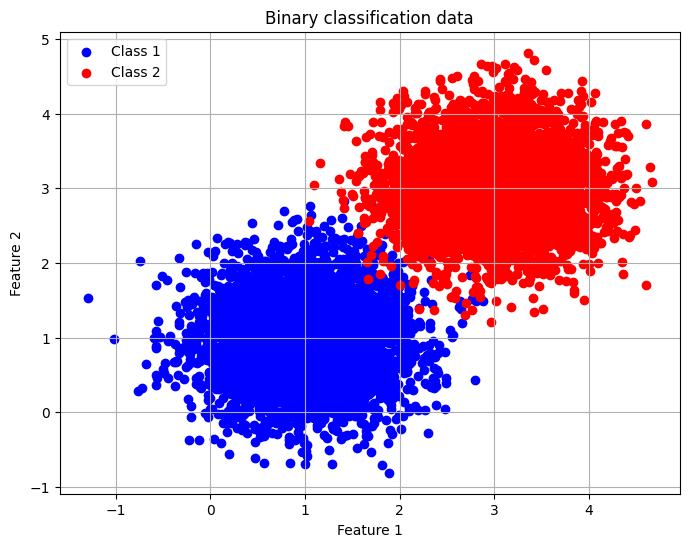

In [10]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


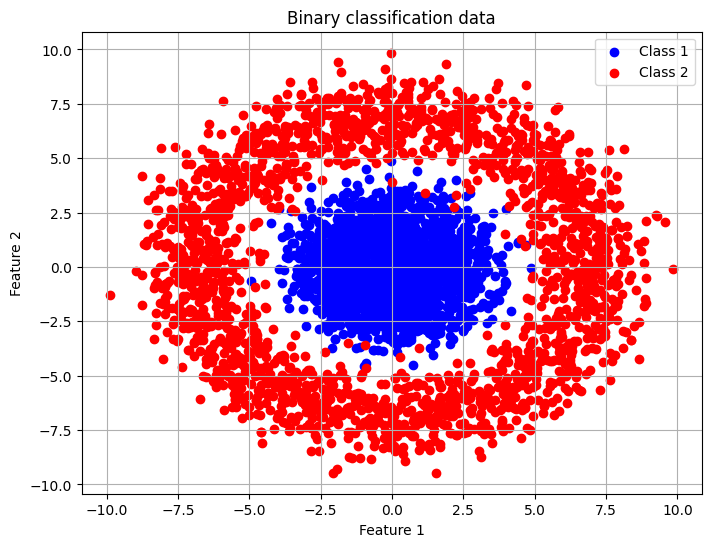

In [11]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Training logistic regression model...
Logistic Regression Test Accuracy: 99.50%


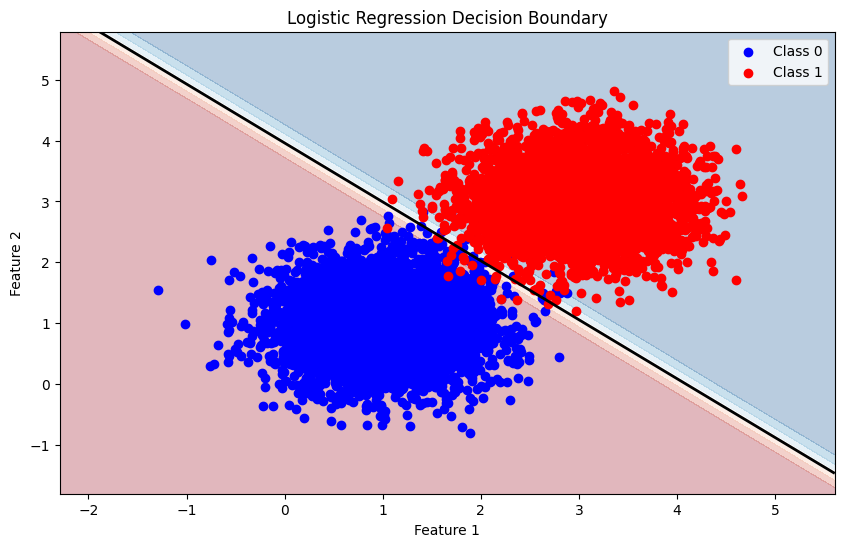


Training neural network model...
Epoch 0/500, Loss: 0.6932
Epoch 100/500, Loss: 0.6908
Epoch 200/500, Loss: 0.0225
Epoch 300/500, Loss: 0.0155
Epoch 400/500, Loss: 0.0138


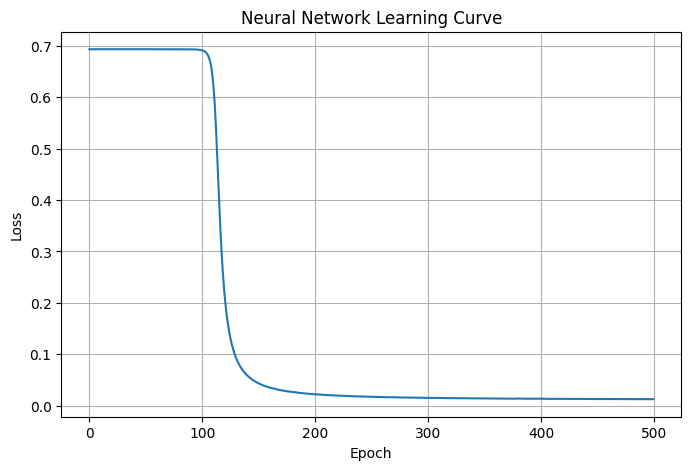

Neural Network Test Accuracy: 99.50%


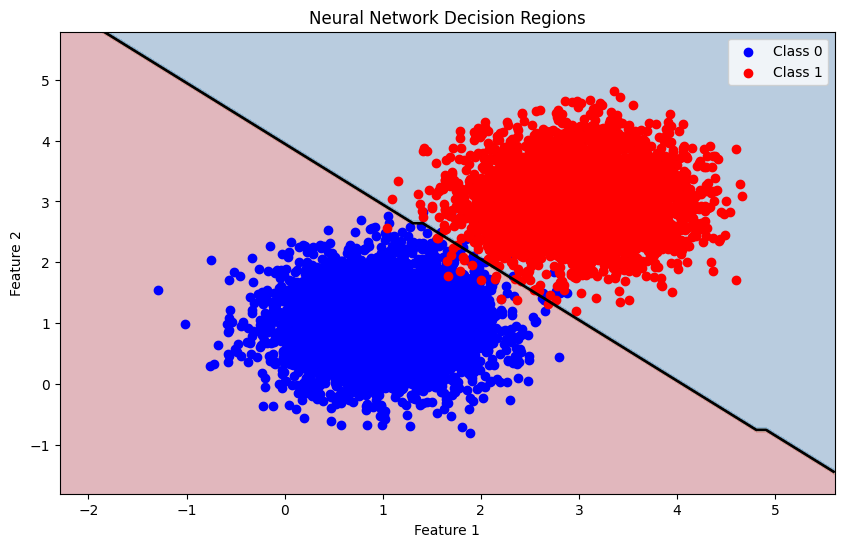


Performance Comparison on Linearly Separable Data:
Logistic Regression Accuracy: 99.50%
Neural Network Accuracy: 99.50%


In [12]:
def sigmoid(z):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-np.clip(z, -500, 500)))  # Clip for numerical stability

def Logistic_Regression(X_train, y_train, X_test, max_iter=100, tol=1e-6):
    """Logistic Regression using IRLS"""
    # Add bias term
    X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    # Initialize weights
    n_features = X_train_bias.shape[1]
    w = np.zeros(n_features)
    
    # IRLS algorithm
    for i in range(max_iter):
        # Current predictions
        z = np.dot(X_train_bias, w)
        y_pred = sigmoid(z)
        
        # Gradient: X^T(y - p)
        gradient = np.dot(X_train_bias.T, (y_train - y_pred))
        
        # Hessian: X^T W X, where W is diagonal with W_ii = p_i(1-p_i)
        W_diag = y_pred * (1 - y_pred)
        hessian = np.dot(X_train_bias.T, X_train_bias * W_diag[:, np.newaxis])
        
        # Newton's update
        delta_w = np.linalg.solve(hessian, gradient)
        w_new = w + delta_w
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            w = w_new
            break
            
        w = w_new
    
    # Test predictions
    z_test = np.dot(X_test_bias, w)
    y_pred = sigmoid(z_test)
    y_pred_binary = (y_pred >= 0.5).astype(int)
    
    return w, y_pred_binary

def plot_decision_boundary(X, y, w):
    """Plot logistic regression decision boundary"""
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict at mesh points
    mesh_points = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z = sigmoid(np.dot(mesh_points, w))
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.contour(xx, yy, Z, [0.5], linewidths=2, colors='black')
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()


def ReLU(x):
    """ReLU activation"""
    return np.maximum(0, x)

def train_neural_network(X_train, y_train, X_test, y_test, hidden_units=3, epochs=1000, 
                         learning_rate=0.01, batch_size=64):
    """Train a 3-layer neural network with the specified architecture"""
    # Input dimensions
    n_samples, n_features = X_train.shape
    
    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(hidden_units, n_features) * 0.01
    b1 = np.zeros((hidden_units, 1))
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    b2 = np.zeros((hidden_units, 1))
    W3 = np.random.randn(1, hidden_units) * 0.01
    b3 = np.zeros((1, 1))
    
    # Training loop
    losses = []
    n_batches = int(np.ceil(n_samples / batch_size))
    
    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(n_samples)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]
        
        epoch_loss = 0
        
        for b in range(n_batches):
            # Get batch
            start_idx = b * batch_size
            end_idx = min(start_idx + batch_size, n_samples)
            X_batch = X_shuffled[start_idx:end_idx].T
            y_batch = y_shuffled[start_idx:end_idx].reshape(1, -1)
            
            # Forward pass
            Z1 = np.dot(W1, X_batch) + b1
            A1 = ReLU(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = ReLU(Z2)
            Z3 = np.dot(W3, A2) + b3
            A3 = sigmoid(Z3)
            
            # Compute loss
            batch_loss = -np.mean(y_batch * np.log(A3 + 1e-10) + 
                                  (1 - y_batch) * np.log(1 - A3 + 1e-10))
            epoch_loss += batch_loss
            
            # Backward pass
            m = X_batch.shape[1]
            dZ3 = A3 - y_batch
            dW3 = np.dot(dZ3, A2.T) / m
            db3 = np.sum(dZ3, axis=1, keepdims=True) / m
            
            dZ2 = np.dot(W3.T, dZ3) * (A2 > 0)
            dW2 = np.dot(dZ2, A1.T) / m
            db2 = np.sum(dZ2, axis=1, keepdims=True) / m
            
            dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
            dW1 = np.dot(dZ1, X_batch.T) / m
            db1 = np.sum(dZ1, axis=1, keepdims=True) / m
            
            # Update weights
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W3 -= learning_rate * dW3
            b3 -= learning_rate * db3
        
        # Record loss
        losses.append(epoch_loss / n_batches)
        
        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {losses[-1]:.4f}")
    
    # Store parameters
    parameters = {
        "W1": W1, "b1": b1,
        "W2": W2, "b2": b2,
        "W3": W3, "b3": b3
    }
    
    # Plot learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(losses)
    plt.title('Neural Network Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    
    # Return the second layer activations for training data
    Z1 = np.dot(W1, X_train.T) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    
    return parameters, A2

def predict_nn(X, parameters):
    """Make predictions with trained neural network"""
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    W3, b3 = parameters["W3"], parameters["b3"]
    
    # Forward pass
    Z1 = np.dot(W1, X.T) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    # Binary prediction
    y_pred = (A3 >= 0.5).astype(int)
    return y_pred.T.ravel()

def plot_decision_regions_nn(X, y, parameters):
    """Plot neural network decision regions"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Reshape for prediction
    mesh_X = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_nn(mesh_X, parameters)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.contour(xx, yy, Z, [0.5], linewidths=2, colors='black')
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Regions')
    plt.legend()
    plt.show()


##################################################
# Classify the linearly separable data using linear classification models
##################################################

# Train logistic regression
print("Training logistic regression model...")
w_lr, y_pred_lr = Logistic_Regression(tr_data, tr_targets, te_data)

# Evaluate
lr_accuracy = np.mean(y_pred_lr == te_targets) * 100
print(f"Logistic Regression Test Accuracy: {lr_accuracy:.2f}%")

# Plot decision boundary
plot_decision_boundary(tr_data, tr_targets, w_lr)

##################################################
# Classify the linearly separable data using deep neural based classification models
##################################################

# Train neural network
print("\nTraining neural network model...")
nn_params, layer2_activations = train_neural_network(
    tr_data, tr_targets, te_data, te_targets, 
    hidden_units=3, epochs=500, learning_rate=0.01
)


# Make predictions
y_pred_nn = predict_nn(te_data, nn_params)
nn_accuracy = np.mean(y_pred_nn == te_targets) * 100
print(f"Neural Network Test Accuracy: {nn_accuracy:.2f}%")

# Plot decision regions
plot_decision_regions_nn(tr_data, tr_targets, nn_params)

##################################################
# Compare the performance of both the models on linearly separable data
##################################################

print("\nPerformance Comparison on Linearly Separable Data:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")
print(f"Neural Network Accuracy: {nn_accuracy:.2f}%")



Training logistic regression on non-linearly separable data...
Logistic Regression Test Accuracy: 46.75%


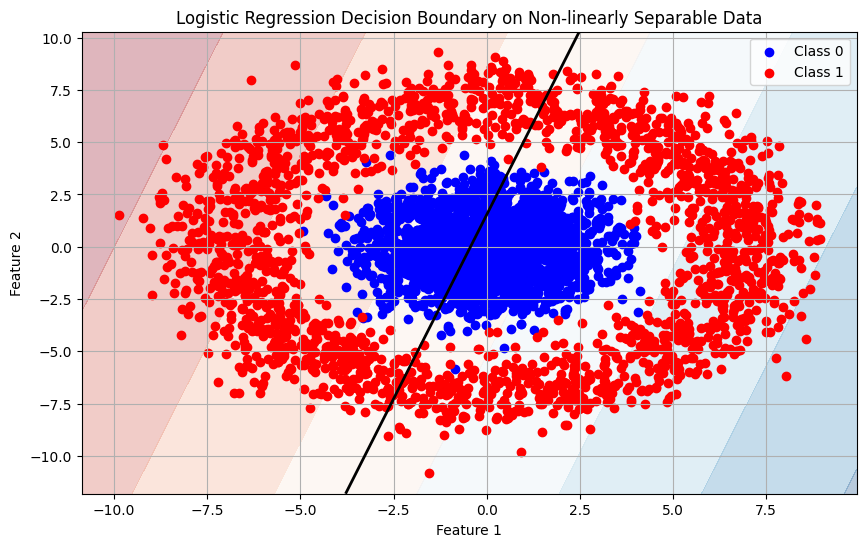


Training neural network on non-linearly separable data...
Epoch 0/500, Loss: 0.6932
Epoch 100/500, Loss: 0.6932
Epoch 200/500, Loss: 0.6932
Epoch 300/500, Loss: 0.6931
Epoch 400/500, Loss: 0.6926


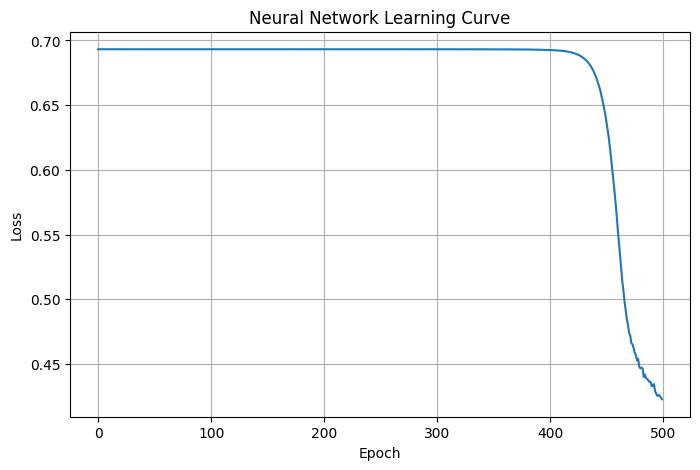

Neural Network Test Accuracy: 84.75%


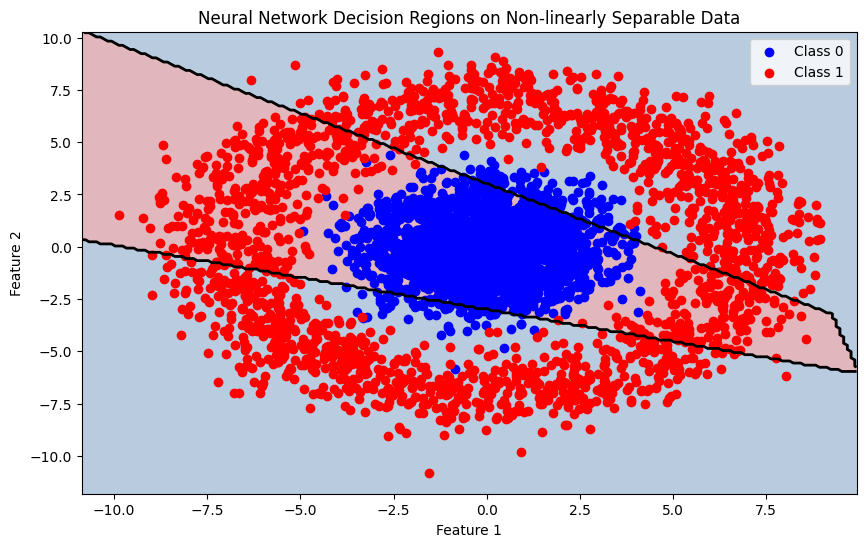


Performance Comparison on Non-linearly Separable Data:
Logistic Regression Accuracy: 46.75%
Neural Network Accuracy: 84.75%
Improvement: 38.00%


In [13]:
##################################################
# Classify the non-linearly separable data using linear classification models
##################################################

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Regenerate the non-linearly separable data
def generate_concentric_data(n_samples, radius1, radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std * np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000
train_ratio = 0.9
np.random.seed(42)  # for reproducibility

class1_data, class2_data = generate_concentric_data(n_samples, 2, 7, 1)

# Combine class1 and class2 data
X = np.concatenate([class1_data, class2_data], axis=0)
y = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])

# Shuffle data
indices = np.random.permutation(len(y))
X = X[indices]
y = y[indices]

# Split into train and test
train_size = int(len(y) * train_ratio)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-np.clip(z, -500, 500)))  # Clip for numerical stability

# Logistic Regression using IRLS
def Logistic_Regression(X_train, y_train, X_test, max_iter=100, tol=1e-6):
    # Add bias term
    X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    # Initialize weights
    n_features = X_train_bias.shape[1]
    w = np.zeros(n_features)
    
    # IRLS algorithm
    for i in range(max_iter):
        # Current predictions
        z = np.dot(X_train_bias, w)
        y_pred = sigmoid(z)
        
        # Gradient: X^T(y - p)
        gradient = np.dot(X_train_bias.T, (y_train - y_pred))
        
        # Hessian: X^T W X, where W is diagonal with W_ii = p_i(1-p_i)
        W_diag = y_pred * (1 - y_pred)
        hessian = np.dot(X_train_bias.T, X_train_bias * W_diag[:, np.newaxis])
        
        # Newton's update
        try:
            delta_w = np.linalg.solve(hessian, gradient)
            w_new = w + delta_w
        except np.linalg.LinAlgError:
            # Handle singular matrix
            delta_w = np.dot(np.linalg.pinv(hessian), gradient)
            w_new = w + delta_w
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            w = w_new
            break
            
        w = w_new
    
    # Test predictions
    z_test = np.dot(X_test_bias, w)
    y_pred = sigmoid(z_test)
    y_pred_binary = (y_pred >= 0.5).astype(int)
    
    return w, y_pred_binary

# Train logistic regression
print("Training logistic regression on non-linearly separable data...")
w_lr, y_pred_lr = Logistic_Regression(X_train, y_train, X_test)

# Calculate accuracy
accuracy_lr = np.mean(y_pred_lr == y_test) * 100
print(f"Logistic Regression Test Accuracy: {accuracy_lr:.2f}%")

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
mesh_points = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = sigmoid(np.dot(mesh_points, w_lr))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.contour(xx, yy, Z, [0.5], linewidths=2, colors='black')
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary on Non-linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

##################################################
# Classify the non-linearly separable data using deep neural based classification models
##################################################

def ReLU(x):
    """ReLU activation"""
    return np.maximum(0, x)

def train_neural_network(X_train, y_train, X_test, y_test, hidden_units=3, epochs=1000, 
                         learning_rate=0.01, batch_size=64):
    """Train a 3-layer neural network with the specified architecture"""
    # Input dimensions
    n_samples, n_features = X_train.shape
    
    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(hidden_units, n_features) * 0.01
    b1 = np.zeros((hidden_units, 1))
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    b2 = np.zeros((hidden_units, 1))
    W3 = np.random.randn(1, hidden_units) * 0.01
    b3 = np.zeros((1, 1))
    
    # Training loop
    losses = []
    n_batches = int(np.ceil(n_samples / batch_size))
    
    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(n_samples)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]
        
        epoch_loss = 0
        
        for b in range(n_batches):
            # Get batch
            start_idx = b * batch_size
            end_idx = min(start_idx + batch_size, n_samples)
            X_batch = X_shuffled[start_idx:end_idx].T
            y_batch = y_shuffled[start_idx:end_idx].reshape(1, -1)
            
            # Forward pass
            Z1 = np.dot(W1, X_batch) + b1
            A1 = ReLU(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = ReLU(Z2)
            Z3 = np.dot(W3, A2) + b3
            A3 = sigmoid(Z3)
            
            # Compute loss
            batch_loss = -np.mean(y_batch * np.log(A3 + 1e-10) + 
                                  (1 - y_batch) * np.log(1 - A3 + 1e-10))
            epoch_loss += batch_loss
            
            # Backward pass
            m = X_batch.shape[1]
            dZ3 = A3 - y_batch
            dW3 = np.dot(dZ3, A2.T) / m
            db3 = np.sum(dZ3, axis=1, keepdims=True) / m
            
            dZ2 = np.dot(W3.T, dZ3) * (A2 > 0)
            dW2 = np.dot(dZ2, A1.T) / m
            db2 = np.sum(dZ2, axis=1, keepdims=True) / m
            
            dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
            dW1 = np.dot(dZ1, X_batch.T) / m
            db1 = np.sum(dZ1, axis=1, keepdims=True) / m
            
            # Update weights
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W3 -= learning_rate * dW3
            b3 -= learning_rate * db3
        
        # Record loss
        losses.append(epoch_loss / n_batches)
        
        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {losses[-1]:.4f}")
    
    # Store parameters
    parameters = {
        "W1": W1, "b1": b1,
        "W2": W2, "b2": b2,
        "W3": W3, "b3": b3
    }
    
    # Plot learning curve
    plt.figure(figsize=(8, 5))
    plt.plot(losses)
    plt.title('Neural Network Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    
    # Return the second layer activations for training data
    Z1 = np.dot(W1, X_train.T) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    
    return parameters, A2

def predict_nn(X, parameters):
    """Make predictions with trained neural network"""
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    W3, b3 = parameters["W3"], parameters["b3"]
    
    # Forward pass
    Z1 = np.dot(W1, X.T) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    # Binary prediction
    y_pred = (A3 >= 0.5).astype(int)
    return y_pred.T.ravel()

def plot_decision_regions_nn(X, y, parameters):
    """Plot neural network decision regions"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Reshape for prediction
    mesh_X = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_nn(mesh_X, parameters)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.contour(xx, yy, Z, [0.5], linewidths=2, colors='black')
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Regions on Non-linearly Separable Data')
    plt.legend()
    plt.show()


# Train neural network
print("\nTraining neural network on non-linearly separable data...")
nn_params, layer2_activations = train_neural_network(
    X_train, y_train, X_test, y_test, 
    hidden_units=3, epochs=500, learning_rate=0.01
)


# Make predictions
y_pred_nn = predict_nn(X_test, nn_params)
accuracy_nn = np.mean(y_pred_nn == y_test) * 100
print(f"Neural Network Test Accuracy: {accuracy_nn:.2f}%")

# Plot decision regions
plot_decision_regions_nn(X, y, nn_params)

##################################################
# Compare the performance of both the models on non-linearly separable data
##################################################

print("\nPerformance Comparison on Non-linearly Separable Data:")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}%")
print(f"Neural Network Accuracy: {accuracy_nn:.2f}%")
print(f"Improvement: {accuracy_nn - accuracy_lr:.2f}%")



<b> Report your observations </b>

1. Logistic regression performs poorly (46%) on this non-linearly separable data. But neural net performs with 84.75%, and it has a good decision boundary capturing all the classifications really well


2. Logistic regression can only learn linear decision boundaries, making it fundamentally
   incapable for non linear seperable data

3. On the other hand, The neural network, even with just 3 hidden units, can learn some non-linear relationships.

4. For linearly separable data, both models achieve high accuracy, as logistic regression is simpler, faster to train, and requires fewer parameters. The neural network creates a very close linear bounday, similar to the logistic reg boundary. The accuracies are also very close.



